In [1]:
import ase
from mendeleev import Al as elm  # The species
import os
from amstools import *
from ase.lattice.cubic import FaceCenteredCubic
import matplotlib.pyplot as plt
import numpy as np
from ase import io
from ase.optimize import LBFGS
# Load remaining modules
import shutil
import os
import glob
import numpy as np
import copy

In [2]:
def closed(atom,target,dif=[0.1,0.1,0.1]):
    check=[False,False,False]
    for i in range(3):
        if atom[i] > target[i]-dif[i] and atom[i] < target[i]+dif[i]:
            check[i]=True
    return all(check)

In [3]:
fcc = FaceCenteredCubic(directions=[[1,0,0], [0,1,0], [0,0,1]],
                          size=(1,1,1), symbol=elm.symbol, pbc=(1,1,1),
                          latticeconstant=4.05)

In [4]:
cell=fcc*[12,12,12]
#cell = fcc*(2,2,2)

In [5]:
cell1=cell.copy() # !!! copy
cell1.pop(0)

Atom('Al', [0.0, 0.0, 0.0])

In [6]:
# for divacancy(n = 2 and n p = 1)
distances=[]

a0=4.05
vec_1=np.array([0,6*a0/2,6*a0/2]) 
vecs = [vec_1]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)

17.182694782833103 [ 0.   12.15 12.15]


In [7]:
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

Target 1NN, Atom is 156


In [8]:
!mkdir ./cluster_struc_S12_big
from ase.io import write
cell_base=cell.copy() # divacancy
atm2=cell_base.pop(atom_list[0])  
atm1=cell_base.pop(0)
write("./cluster_struc_S12_big/divac_Al.cfg",cell_base)


In [9]:
write("./cluster_struc_S12_big/Al.cfg",cell)

In [10]:
# for triangle(n = 3 and n p = 3)
distances=[]

a0=4.05
vec_1=np.array([0,6*a0/2,6*a0/2])
vec_2=np.array([0,6*a0,0])
vecs = [vec_1,vec_2]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

from ase.io import write
cell_base=cell.copy() 
atm3=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[0])  
atm1=cell_base.pop(0)
write("./cluster_struc_S12_big/tri_Al.cfg",cell_base)


17.182694782833103 [ 0.   12.15 12.15]
24.299999999999997 [ 0.  24.3  0. ]
Target 1NN, Atom is 156
Target 2NN, Atom is 288


In [11]:
# for square(n = 4 and n p = 4)
distances=[]

a0=4.05
vec_1=np.array([6*a0,0,0])
vec_2=np.array([0,0,6*a0])
vec_3=np.array([6*a0,0,6*a0])
vecs = [vec_1,vec_2,vec_3]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)
#!mkdir ./square
from ase.io import write
cell_base=cell.copy()
atm4=cell_base.pop(atom_list[2])
atm3=cell_base.pop(atom_list[0])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(0)
write("./cluster_struc_S12_big/sqr_Al.cfg",cell_base)


24.299999999999997 [24.3  0.   0. ]
24.299999999999997 [ 0.   0.  24.3]
34.365389565666206 [24.3  0.  24.3]
Target 1NN, Atom is 3456
Target 2NN, Atom is 24
Target 3NN, Atom is 3480


In [12]:
# for bent rhombus(n = 4 and n p = 5)
distances=[]

a0=4.05
vec_1=np.array([0,0,6*a0])
vec_2=np.array([0,6*a0/2,6*a0/2])
vec_3=np.array([6*a0/2,0,6*a0/2])
vecs = [vec_1,vec_2,vec_3]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)
#!mkdir ./bent_rhombus
from ase.io import write
cell_base=cell.copy()
atm4=cell_base.pop(atom_list[2])
atm3=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[0])  
atm1=cell_base.pop(0)
write("./cluster_struc_S12_big/b_rhom_Al.cfg",cell_base)


24.299999999999997 [ 0.   0.  24.3]
17.182694782833103 [ 0.   12.15 12.15]
17.182694782833103 [12.15  0.   12.15]
Target 1NN, Atom is 24
Target 2NN, Atom is 156
Target 3NN, Atom is 1740


In [13]:
# for tetrahedron(n = 4 and n p = 6)
distances=[]

a0=4.05
vec_1=np.array([0,6*a0/2,6*a0/2])
vec_2=np.array([0,6*a0,0])
vec_3=np.array([6*a0/2,6*a0/2,0])
vecs = [vec_1,vec_2,vec_3]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

from ase.io import write
cell_base=cell.copy() 
atm4=cell_base.pop(atom_list[2])
atm3=cell_base.pop(atom_list[1]) 
atm2=cell_base.pop(atom_list[0])
atm1=cell_base.pop(0)
write("./cluster_struc_S12_big/tetra_Al.cfg",cell_base)


17.182694782833103 [ 0.   12.15 12.15]
24.299999999999997 [ 0.  24.3  0. ]
17.182694782833103 [12.15 12.15  0.  ]
Target 1NN, Atom is 156
Target 2NN, Atom is 288
Target 3NN, Atom is 1872


In [15]:
# for pyramid(n = 5 and n p = 8)
distances=[]

a0=4.05
vec_1=np.array([6*a0,0,0])
vec_2=np.array([0,0,6*a0])
vec_3=np.array([6*a0,0,6*a0])
vec_4=np.array([6*a0/2,6*a0/2,6*a0])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

from ase.io import write
cell_base=cell.copy()
atm4=cell_base.pop(atom_list[2])
atm3=cell_base.pop(atom_list[0])
atm2=cell_base.pop(atom_list[3])
atm2=cell_base.pop(atom_list[1])
atm1=cell_base.pop(0)
write("./cluster_struc_S12_big/pyramind_Al.cfg",cell_base)


24.299999999999997 [24.3  0.   0. ]
24.299999999999997 [ 0.   0.  24.3]
34.365389565666206 [24.3  0.  24.3]
29.76130037481561 [12.15 12.15 24.3 ]
Target 1NN, Atom is 3456
Target 2NN, Atom is 24
Target 3NN, Atom is 3480
Target 4NN, Atom is 1896


In [16]:
# for octahedron(n = 6 and n p = 12)
distances=[]

a0=4.05
vec_3=np.array([0,6*a0/2,6*a0/2])
vec_2=np.array([6*a0/2,0,6*a0/2])
vec_1=np.array([6*a0/2,6*a0/2,0])
vec_4=np.array([6*a0/2,6*a0/2,6*a0])
vec_5=np.array([6*a0/2,6*a0,6*a0/2])
vec_6=np.array([6*a0,6*a0/2,6*a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

17.182694782833103 [12.15 12.15  0.  ]
17.182694782833103 [12.15  0.   12.15]
17.182694782833103 [ 0.   12.15 12.15]
29.76130037481561 [12.15 12.15 24.3 ]
29.76130037481561 [12.15 24.3  12.15]
29.76130037481561 [24.3  12.15 12.15]
Target 1NN, Atom is 1872
Target 2NN, Atom is 1740
Target 3NN, Atom is 156
Target 4NN, Atom is 1896
Target 5NN, Atom is 2028
Target 6NN, Atom is 3612


In [17]:
from ase.io import write
cell_base=cell.copy()
atm6=cell_base.pop(atom_list[5])
atm5=cell_base.pop(atom_list[4])
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[0])
atm2=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[2])
#atm1=cell_base.pop(0)
write("./cluster_struc_S12_big/octahedron_Al.cfg",cell_base)


In [18]:
def graph_init():
    #plt.rcParams['text.usetex'] = True
    plt.figure(figsize=(8,6))
    plt.style.use('seaborn-paper')
    params = {'font.size':16 , 'legend.fontsize': 14,'xtick.labelsize' : 14,'ytick.labelsize' : 14,'axes.labelsize' : 16}
    plt.rcParams.update(params)

In [19]:
#from ase.neb import NEB, NEBTools
from ase.neb import SingleCalculatorNEB, NEBTools
# Load AMS Tools (REQUIRED)
from amstools import *
# Load pyace (REQUIRED)
from pyace import *
from ase.io import cfg

In [20]:
def mycalc(key):
    if key == 'eam':
        # EAM calculator

        #pot_folder = '/home/users/kraycazx/workdir/gitworkdir/2_bcc_multipot/0_Potentials/Al'
        os.environ['ASE_LAMMPSRUN_COMMAND']='/home/eliza/Downloads/lammps-16Mar18/src/lmp_mpi'
        #potential_file='{}/Eam_Al_99.eam'.format(pot_folder) they can add without % or +
        potential_file="Al99.eam.alloy"
        calculator_lmp_params = {'mass': ['1 {}'.format(elm.mass)],
            'pair_style': 'eam/fs',
            'pair_coeff': ['* * {} {}'.format(potential_file,elm.symbol)],
            'keep_tmp_files' : True,
            'tmp_dir' : "/tmp/test_eam"}
        from ase.calculators.lammpsrun import LAMMPS
        calc = LAMMPS(**calculator_lmp_params)
        return calc
    if key == 'ace':
        
        potential_file="Al.pbe.in.yaml"
        calc = PyACECalculator(potential_file)
        return calc

In [21]:
folder = ['./cluster_struc_S12_big/divac_Al.cfg', './cluster_struc_S12_big/tri_Al.cfg','./cluster_struc_S12_big/sqr_Al.cfg',
          './cluster_struc_S12_big/b_rhom_Al.cfg','./cluster_struc_S12_big/tetra_Al.cfg', './cluster_struc_S12_big/pyramind_Al.cfg',
          './cluster_struc_S12_big/octahedron_Al.cfg']
atoms = [2,3,4,4,4,5,6]

In [22]:
N=len(cell)
N

6912

In [23]:
myresults={}

for key in ['eam','ace']:
    myresults[key]={}
    print(key)
    #cell.set_calculator(mycalc(key))
    Al_cell="./cluster_struc_S12_big/Al.cfg"
    comp_cell=cfg.read_cfg(Al_cell)
    def relax(cell,fmax=1E-3,calc=mycalc(key),runing=True):
        cell.set_calculator(calc)
        rlx=LBFGS(cell)
        if runing:
            rlx.run(fmax=fmax) 
        return(cell.get_potential_energy())
    E_0_relax = relax(comp_cell,fmax=0.001,runing=True)
    E_0 = relax(comp_cell,fmax=0.001,runing=False)
    #cells=create_cells(cell)
    cell1=cell.copy()
    cell1.pop(0)
    divacancy_energies_unrelax=[]
    divacancy_energies_relax=[]
    for i, j in zip(folder, atoms):
        initial_cell= i
        cell_base=cfg.read_cfg(initial_cell)
        E_f_1 = relax(cell1,fmax=0.001,runing=False) - ((N-1) * E_0/N)
        E_f_2 = relax(cell1,fmax=0.001,runing=True) - (N-1) * E_0_relax/N
        divacancy_energies_unrelax.append( j*E_f_1 - ( relax(cell_base,fmax=0.001,runing=False) - ((N-j) * E_0/N) ) )
        divacancy_energies_relax.append( j*E_f_2 - ( relax(cell_base,fmax=0.001,runing=True) - ((N-j) * E_0_relax/N) ) )
        myresults[key]['divac_e_ur']=divacancy_energies_unrelax
        myresults[key]['divac_e_r']=divacancy_energies_relax
        myresults[key]['Ef_ur']=E_f_1
        myresults[key]['Ef_r']=E_f_2


#print(a0,E_0)
print('unrelax',divacancy_energies_unrelax)
print('relax',divacancy_energies_relax)


eam
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:45:29   -23224.319918*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:45:30   -23220.190761*       0.2419
LBFGS:    1 14:45:30   -23220.201389*       0.2247
LBFGS:    2 14:45:30   -23220.266685*       0.0630
LBFGS:    3 14:45:30   -23220.268149*       0.0589
LBFGS:    4 14:45:30   -23220.278970*       0.0155
LBFGS:    5 14:45:30   -23220.279616*       0.0167
LBFGS:    6 14:45:30   -23220.280153*       0.0158
LBFGS:    7 14:45:30   -23220.280921*       0.0129
LBFGS:    8 14:45:31   -23220.281896*       0.0143
LBFGS:    9 14:45:31   -23220.282474*       0.0072
LBFGS:   10 14:45:31   -23220.282705*       0.0070
LBFGS:   11 14:45:31   -23220.282862*       0.0062
LBFGS:   12 14:45:31   -23220.283113*       0.0088
LBFGS:   13 14:45:31   -23220.283415*       0.0094
LBFGS:   14 14:45:31   -23220.283

LBFGS:   26 14:45:48   -23208.176957*       0.0012
LBFGS:   27 14:45:48   -23208.177022*       0.0019
LBFGS:   28 14:45:49   -23208.177118*       0.0026
LBFGS:   29 14:45:49   -23208.177212*       0.0020
LBFGS:   30 14:45:49   -23208.177268*       0.0012
LBFGS:   31 14:45:49   -23208.177302*       0.0012
LBFGS:   32 14:45:49   -23208.177346*       0.0016
LBFGS:   33 14:45:49   -23208.177419*       0.0024
LBFGS:   34 14:45:49   -23208.177507*       0.0022
LBFGS:   35 14:45:50   -23208.177571*       0.0016
LBFGS:   36 14:45:50   -23208.177607*       0.0015
LBFGS:   37 14:45:50   -23208.177641*       0.0013
LBFGS:   38 14:45:50   -23208.177697*       0.0021
LBFGS:   39 14:45:50   -23208.177770*       0.0023
LBFGS:   40 14:45:50   -23208.177829*       0.0015
LBFGS:   41 14:45:50   -23208.177859*       0.0016
LBFGS:   42 14:45:50   -23208.177879*       0.0014
LBFGS:   43 14:45:51   -23208.177906*       0.0013
LBFGS:   44 14:45:51   -23208.177941*       0.0014
LBFGS:   45 14:45:51   -23208.1

LBFGS:   34 14:46:08   -23204.141162*       0.0024
LBFGS:   35 14:46:09   -23204.141241*       0.0018
LBFGS:   36 14:46:09   -23204.141283*       0.0018
LBFGS:   37 14:46:09   -23204.141322*       0.0015
LBFGS:   38 14:46:09   -23204.141385*       0.0022
LBFGS:   39 14:46:09   -23204.141463*       0.0022
LBFGS:   40 14:46:09   -23204.141524*       0.0014
LBFGS:   41 14:46:09   -23204.141554*       0.0014
LBFGS:   42 14:46:10   -23204.141575*       0.0012
LBFGS:   43 14:46:10   -23204.141605*       0.0014
LBFGS:   44 14:46:10   -23204.141643*       0.0015
LBFGS:   45 14:46:10   -23204.141672*       0.0009
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:46:10   -23220.284522*       0.0010
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:46:10   -23199.544946*       0.2420
LBFGS:    1 14:46:11   -23199.608718*       0.2248
LBFGS:    2 14:46:11   -23200.000478*

/home/eliza/.local/lib/python3.8/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 14:46:44   -25453.484122*       0.1302
LBFGS:    1 14:46:57   -25453.488402*       0.1219
LBFGS:    2 14:47:10   -25453.519674*       0.0374
LBFGS:    3 14:47:22   -25453.520506*       0.0347
LBFGS:    4 14:47:35   -25453.525982*       0.0103
LBFGS:    5 14:47:48   -25453.526115*       0.0100
LBFGS:    6 14:48:01   -25453.527310*       0.0043
LBFGS:    7 14:48:14   -25453.527378*       0.0048
LBFGS:    8 14:48:27   -25453.527551*       0.0051
LBFGS:    9 14:48:39   -25453.527700*       0.0041
LBFGS:   10 14:48:52   -25453.527827*       0.0040
LBFGS:   11 14:49:04   -25453.527876*       0.0039
LBFGS:   12 14:49:17   -25453.527913*       0.0033
LBFGS:   13 14:49:31   -25453.527968*       0.0028
LBFGS:   14 14:49:44   -25453.528041*       0.0026
LBFGS:   15 14:49:56   -25453.528099*       0.0017
LBFGS:   16 14:50:10   -25453.528125*       0.0022
LBFGS:   17 14:50:22   -25453.5281

LBFGS:   31 15:17:57   -25440.688631*       0.0013
LBFGS:   32 15:18:10   -25440.688650*       0.0012
LBFGS:   33 15:18:23   -25440.688665*       0.0010
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 15:18:36   -25453.528244*       0.0009
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 15:18:48   -25440.512930*       0.1302
LBFGS:    1 15:19:01   -25440.530136*       0.1220
LBFGS:    2 15:19:14   -25440.654968*       0.0393
LBFGS:    3 15:19:27   -25440.658325*       0.0362
LBFGS:    4 15:19:40   -25440.679931*       0.0106
LBFGS:    5 15:19:53   -25440.680430*       0.0102
LBFGS:    6 15:20:06   -25440.684675*       0.0060
LBFGS:    7 15:20:19   -25440.684904*       0.0066
LBFGS:    8 15:20:32   -25440.685482*       0.0060
LBFGS:    9 15:20:45   -25440.685983*       0.0053
LBFGS:   10 15:20:58   -25440.686409*       0.0039
LBFGS:   11 15:21:11   -25440.686577*

In [24]:
for key in ['eam','ace']:
    myresults[key]['X']= [1,3,4,5,6,8,12]

<IPython.core.display.Javascript object>


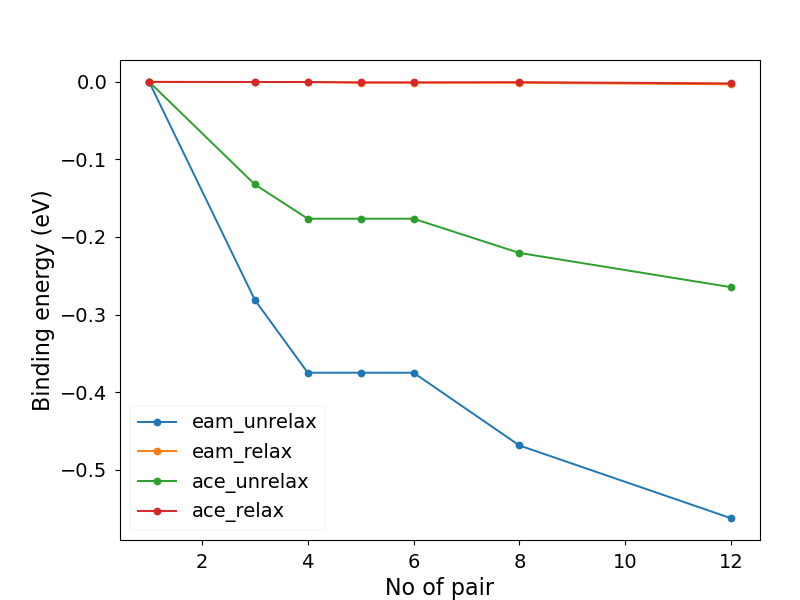

In [25]:
%matplotlib notebook
graph_init()
for key in ['eam','ace']:
    for i in ['unrelax','relax']:
        if i == 'unrelax':
            plt.plot(myresults[key]['X'],myresults[key]['divac_e_ur'],'-o',label='{}_{}'.format(key,i))
        if i == 'relax':
            plt.plot(myresults[key]['X'],myresults[key]['divac_e_r'],'-o',label='{}_{}'.format(key,i))
        plt.xlabel("No of pair")
        plt.ylabel("Binding energy (eV)")

        plt.subplots_adjust(left=0.15,
                            bottom=0.1, 
                            right=0.95, 
                            top=0.90, 
                            wspace=0.05, 
                            hspace=0.05)
        plt.legend()


In [27]:
np.save('cluster_S12_big.npy',myresults)
test1=np.load('cluster_S12_big.npy',allow_pickle='TRUE')
test1

array({'eam': {'divac_e_ur': [-7.2942275437526405e-06, -0.2812946080630354, -0.3750594862794969, -0.3750602361287747, -0.3750602361287747, -0.46882587746949866, -0.562596057778137], 'divac_e_r': [-9.878782293526456e-05, -0.0003540770812833216, -0.0003660028305603191, -0.0011471606703707948, -0.0011471606885606889, -0.0012654800011659972, -0.003236927128455136], 'Ef_ur': 0.6753960381902289, 'Ef_r': 0.6753960381902289, 'X': [1, 3, 4, 5, 6, 8, 12]}, 'ace': {'divac_e_ur': [-1.6611702449154109e-06, -0.13236757220511208, -0.17649001480822335, -0.17649032782719587, -0.17649032781264395, -0.2206129600199347, -0.2647371026541805], 'divac_e_r': [-4.6104458306217566e-05, -0.0001933551648107823, -0.00022008432279108092, -0.0007552423048764467, -0.0007552420393039938, -0.00045343220335780643, -0.0020546984087559395], 'Ef_ur': 0.5964759636481176, 'Ef_r': 0.5964759636481176, 'X': [1, 3, 4, 5, 6, 8, 12]}},
      dtype=object)